<a href="https://colab.research.google.com/github/yeesem/Machine-Learning/blob/main/Tensorflow_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [222]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [223]:
df = pd.read_csv('https://raw.githubusercontent.com/yeesem/Machine-Learning-Datasets/main/kc_house_data.csv')

In [224]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       2
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [225]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21611.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.396095,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.128162,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [226]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


<Axes: xlabel='price', ylabel='Count'>

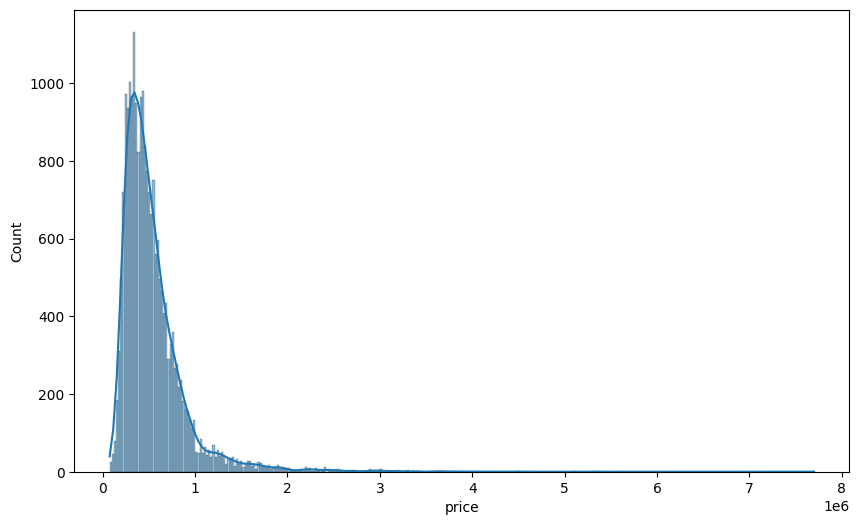

In [227]:
plt.figure(figsize = (10,6))
sns.histplot(df['price'],kde = True)

<Axes: xlabel='bedrooms', ylabel='count'>

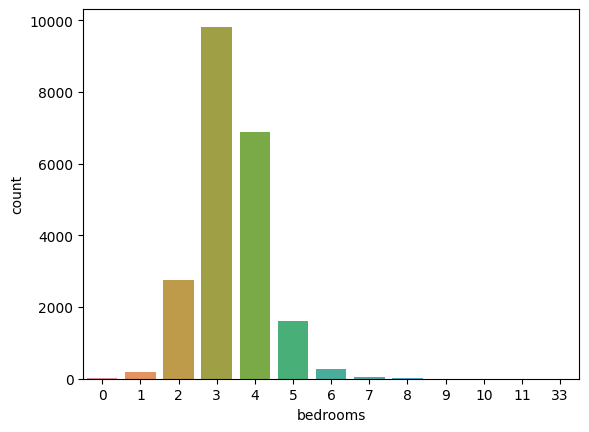

In [228]:
sns.countplot(x = 'bedrooms',data = df)

In [229]:
df.corr()['price']

<ipython-input-229-cbe57b8e6d9c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['price']


id              -0.016762
price            1.000000
bedrooms         0.308350
bathrooms        0.525138
sqft_living      0.702035
sqft_lot         0.089661
floors           0.256794
waterfront       0.266369
view             0.397293
condition        0.036362
grade            0.667434
sqft_above       0.605567
sqft_basement    0.323816
yr_built         0.054012
yr_renovated     0.126434
zipcode         -0.053203
lat              0.307003
long             0.021626
sqft_living15    0.585379
sqft_lot15       0.082447
Name: price, dtype: float64

In [230]:
df.corr()['price'].sort_values()

<ipython-input-230-78b4f396fb2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['price'].sort_values()


zipcode         -0.053203
id              -0.016762
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308350
sqft_basement    0.323816
view             0.397293
bathrooms        0.525138
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='sqft_living'>

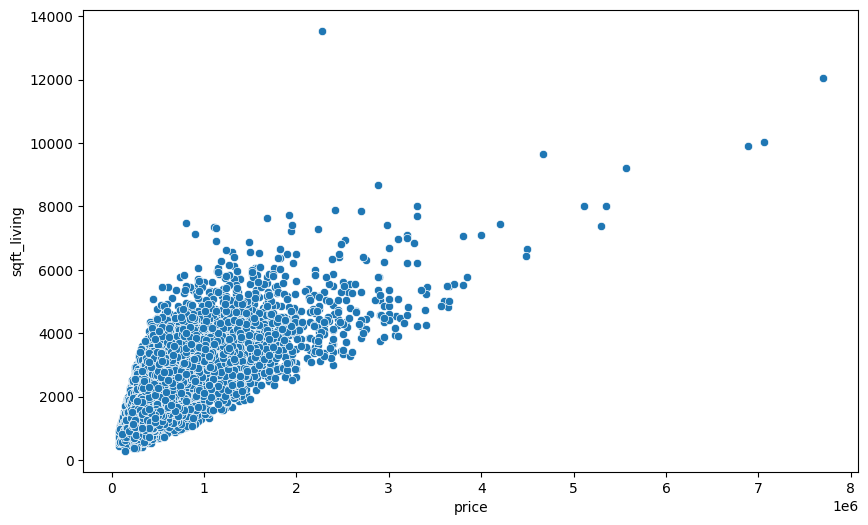

In [231]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = 'price',y = 'sqft_living',data = df)

<Axes: xlabel='bedrooms', ylabel='price'>

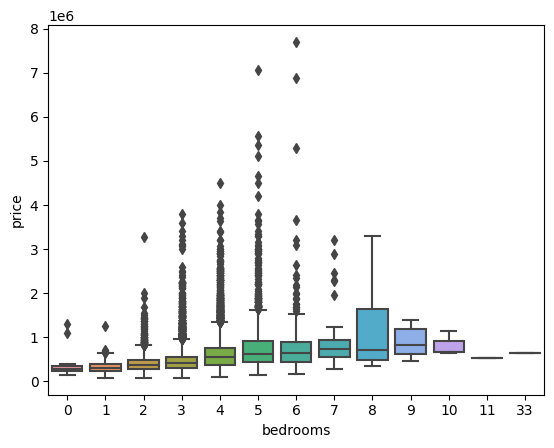

In [232]:
sns.boxplot(x = 'bedrooms',y = 'price',data = df)

<Axes: xlabel='price', ylabel='long'>

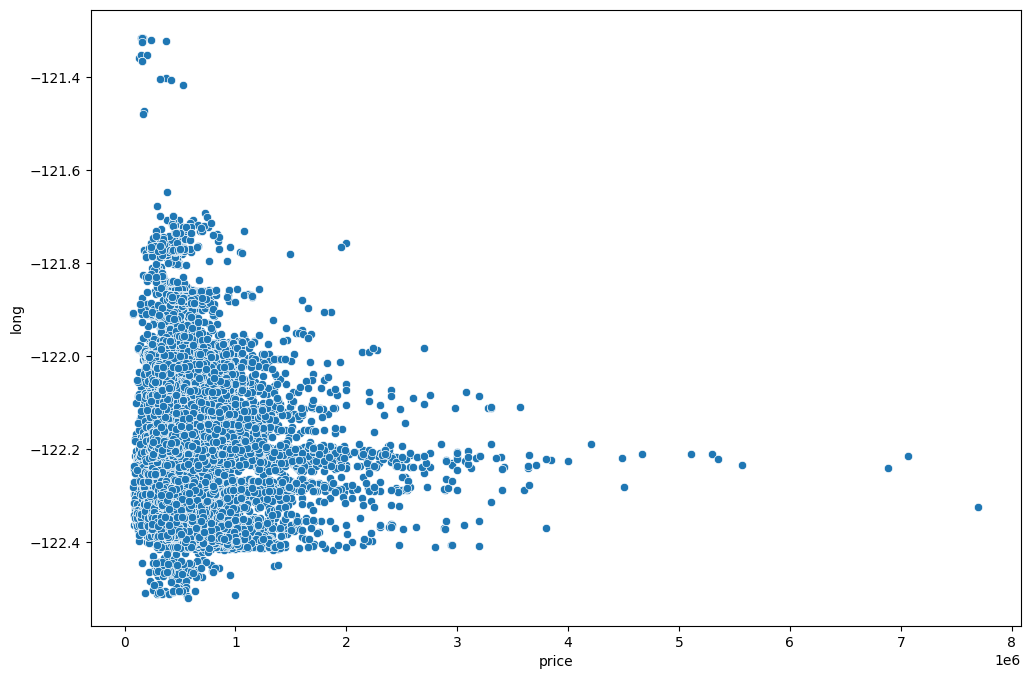

In [233]:
plt.figure(figsize = (12,8))
sns.scatterplot(x = 'price',y = 'long',data = df)

<Axes: xlabel='price', ylabel='lat'>

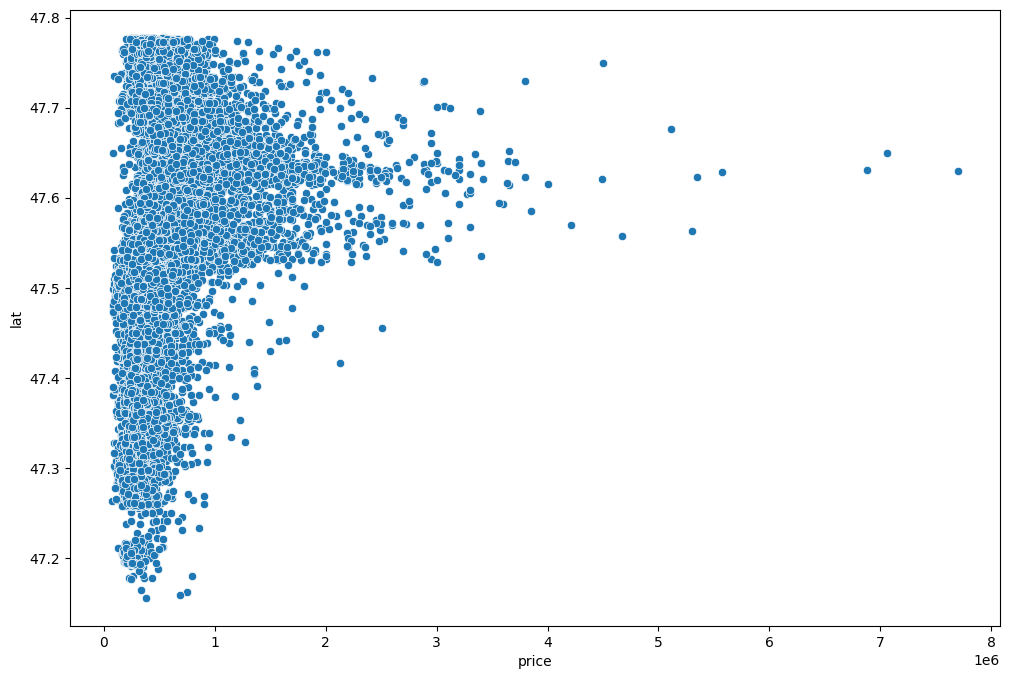

In [234]:
plt.figure(figsize = (12,8))
sns.scatterplot(x = 'price',y = 'lat', data = df)

<Axes: xlabel='long', ylabel='lat'>

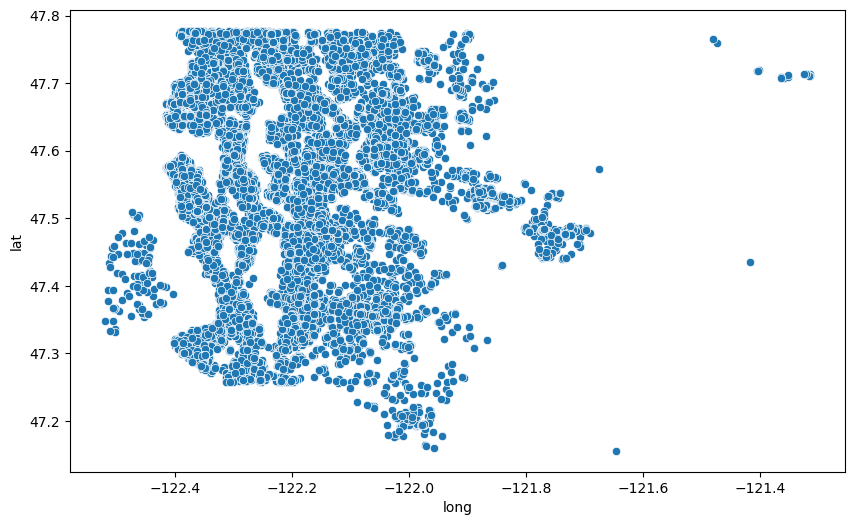

In [235]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = 'long',y = 'lat' , data = df)

<Axes: xlabel='long', ylabel='lat'>

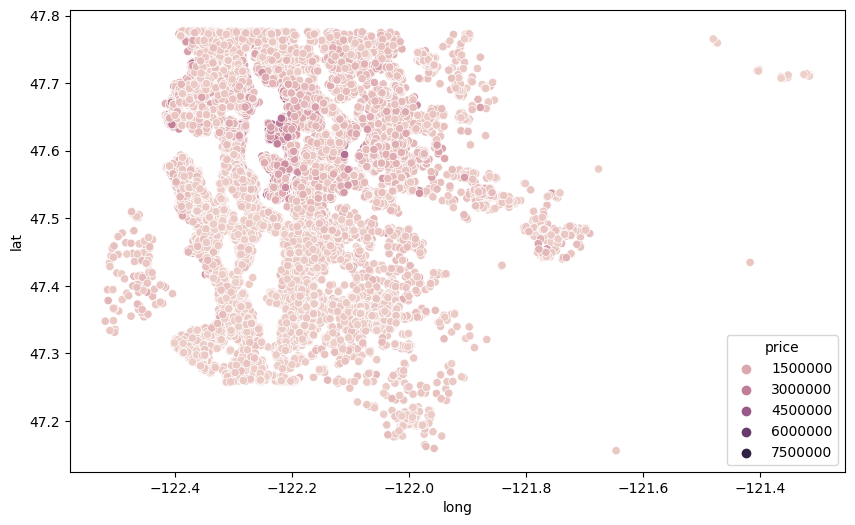

In [236]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = 'long',y = 'lat' , data = df,hue = 'price')

In [237]:
df.sort_values('price',ascending = False).head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7252,6762700020,20141013T000000,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570.0,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3914,9808700762,20140611T000000,7062500.0,5,4.50,10040,37325,2.0,1,2,...,11,7680.0,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9254,9208900037,20140919T000000,6885000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860.0,1030,2001,0,98039,47.6305,-122.240,4540,42730
4411,2470100110,20140804T000000,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200.0,3000,2001,0,98039,47.6289,-122.233,3560,24345
1448,8907500070,20150413T000000,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720.0,1280,2009,0,98004,47.6232,-122.220,4600,21750
1315,7558700030,20150413T000000,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000.0,2390,1991,0,98040,47.5631,-122.210,4320,24619
1164,1247600105,20141020T000000,5110800.0,5,5.25,8010,45517,2.0,1,4,...,12,5990.0,2020,1999,0,98033,47.6767,-122.211,3430,26788
8092,1924059029,20140617T000000,4668000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820.0,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2626,7738500731,20140815T000000,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350.0,290,2004,0,98155,47.7493,-122.280,3030,23408
8638,3835500195,20140618T000000,4489000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430.0,0,2001,0,98004,47.6208,-122.219,3720,14592


In [238]:
#Top 1% houses in the dataset
len(df) * 0.01

216.13

In [239]:
non_top_1_perc = df.sort_values('price',ascending = False).iloc[216:]

<Axes: xlabel='long', ylabel='lat'>

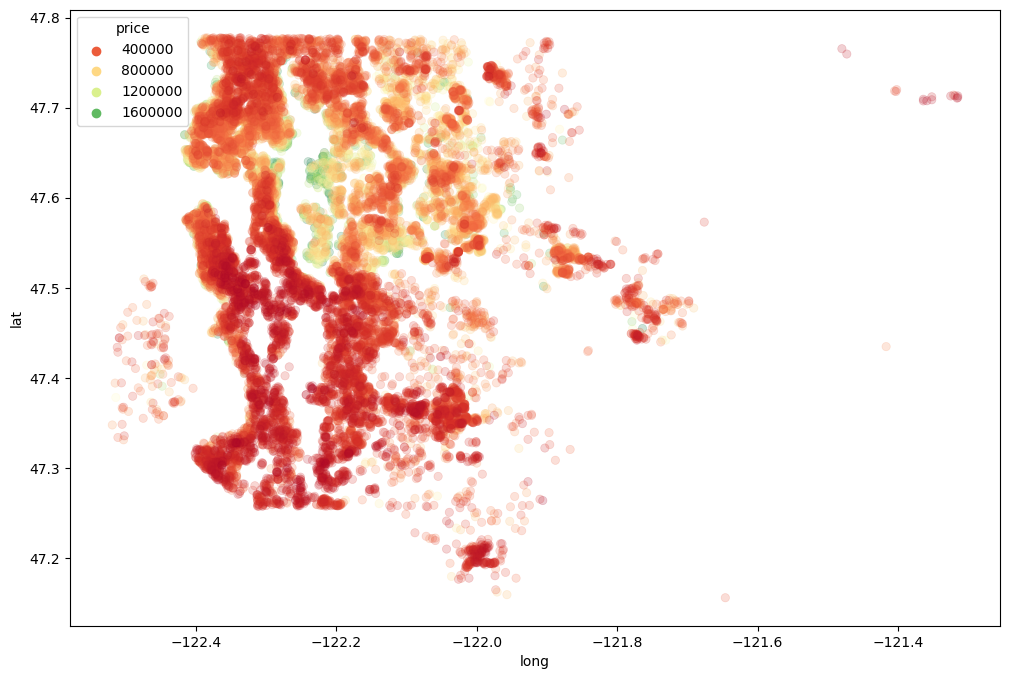

In [240]:
plt.figure(figsize = (12,8))
sns.scatterplot(x = 'long',y = 'lat',data = non_top_1_perc,hue = 'price',
                edgecolor = None,alpha = 0.2,palette = 'RdYlGn')

<Axes: xlabel='waterfront', ylabel='price'>

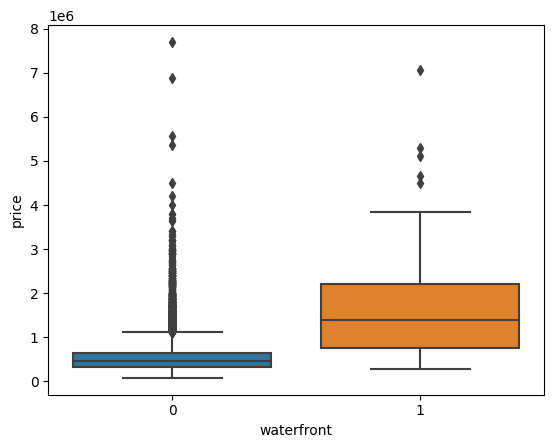

In [241]:
sns.boxplot(x = 'waterfront',y ='price',data=df)

In [242]:
df = df.drop('id',axis = 1)

In [243]:
df['date'] = pd.to_datetime(df['date'])

In [244]:
df['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21608   2014-05-21
21609   2015-02-23
21610   2014-06-23
21611   2015-01-16
21612   2014-10-15
Name: date, Length: 21613, dtype: datetime64[ns]

In [245]:
df['year'] = df['date'].apply(lambda date : date.year)

In [246]:
df['month'] = df['date'].apply(lambda date : date.month)

In [247]:
df.head(2)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12


<Axes: xlabel='month', ylabel='price'>

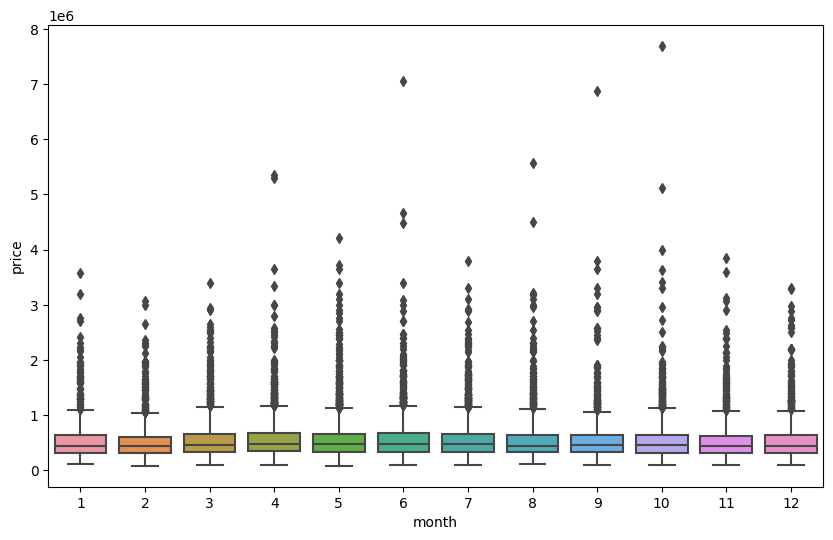

In [248]:
plt.figure(figsize = (10,6))
sns.boxplot(x = 'month',y='price',data = df)

In [249]:
df.groupby('month').mean()

<ipython-input-249-c84ab0e70ab9>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('month').mean()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year
month,,,,,,,,,,,,,,,,,,,,
1,525870.889571,3.387526,2.129346,2085.094070,17869.721881,1.478528,0.008180,0.246421,3.347648,7.642127,1814.019427,271.074642,1971.749489,73.433538,98077.897751,47.553500,-122.212188,1975.859918,12687.026585,2015.000000
2,507851.371200,3.340000,2.059600,2010.974400,13703.131200,1.467600,0.004800,0.243200,3.404800,7.554400,1726.692800,284.281600,1971.464000,51.055200,98076.708000,47.546741,-122.215691,1942.907200,11606.648800,2015.000000
3,543977.187200,3.367467,2.065333,2021.968533,15604.088533,1.464267,0.006933,0.238933,3.355733,7.588267,1740.604800,281.363733,1970.597333,82.976533,98077.578667,47.553377,-122.214041,1951.490133,12678.426133,2015.000000
4,561837.774989,3.364859,2.106006,2060.377409,14265.989691,1.495069,0.008516,0.230390,3.359032,7.651277,1777.734081,282.606455,1971.713133,70.670551,98078.910802,47.560420,-122.213480,1986.544599,12650.147468,2015.000000
5,550768.785833,3.363712,2.116508,2090.514913,16678.293289,1.486123,0.005385,0.239022,3.420464,7.674399,1780.770825,309.818973,1970.216653,105.121375,98079.094863,47.565075,-122.214854,1990.449876,13694.719553,2014.267606
6,558002.199541,3.418349,2.163876,2132.820642,14260.094954,1.513303,0.008716,0.241743,3.460092,7.738532,1822.365138,310.455505,1970.741284,80.543119,98079.594495,47.565591,-122.214406,2035.218807,12842.035780,2014.000000
7,544788.764360,3.391678,2.146540,2128.246495,13857.654907,1.522162,0.006784,0.221167,3.442786,7.716870,1841.531886,286.714609,1971.777024,92.125283,98074.758933,47.560198,-122.206664,2029.130710,12584.116689,2014.000000
8,536445.276804,3.355670,2.123067,2084.762887,14636.380928,1.500258,0.006186,0.223196,3.440206,7.685567,1798.204639,286.558247,1972.058247,78.193814,98077.058247,47.564831,-122.209811,1995.676289,12960.812887,2014.000000
9,529253.821871,3.360203,2.130919,2077.375986,15367.856257,1.490981,0.008455,0.248591,3.430665,7.640361,1785.519166,291.856821,1970.535513,99.047914,98078.445885,47.560565,-122.212648,1982.601466,11894.253100,2014.000000


In [250]:
df.groupby('month').mean()['price']

<ipython-input-250-93396d665159>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('month').mean()['price']


month
1     525870.889571
2     507851.371200
3     543977.187200
4     561837.774989
5     550768.785833
6     558002.199541
7     544788.764360
8     536445.276804
9     529253.821871
10    539026.971778
11    521961.009213
12    524461.866757
Name: price, dtype: float64

<ipython-input-251-f1c036247463>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('month').mean()['price'].plot()


<Axes: xlabel='month'>

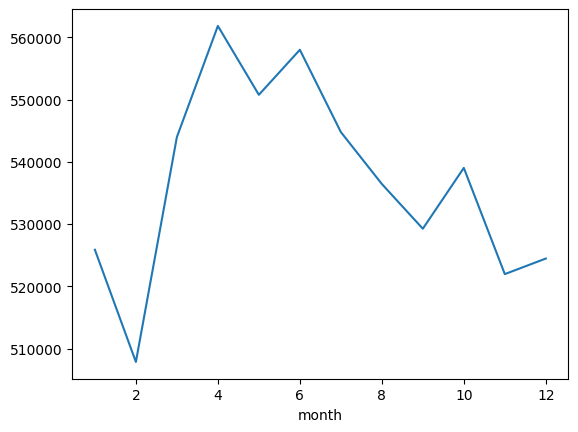

In [251]:
df.groupby('month').mean()['price'].plot()

<ipython-input-252-fee831ba9367>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('year').mean()['price'].plot()


<Axes: xlabel='year'>

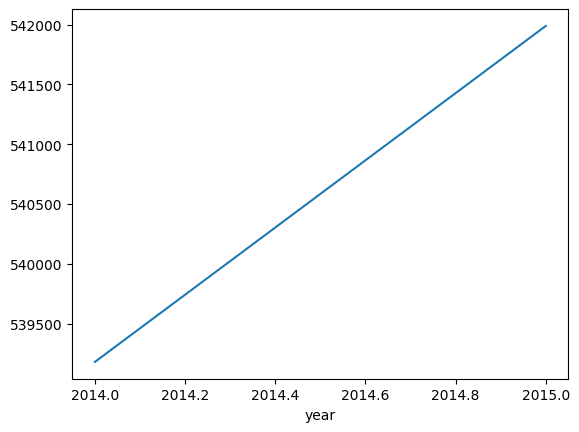

In [252]:
df.groupby('year').mean()['price'].plot()

In [253]:
df = df.drop('date',axis=1)

In [254]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year', 'month'],
      dtype='object')

In [255]:
df['zipcode'].value_counts()

98103    602
98038    590
98115    583
98052    574
98117    553
        ... 
98102    105
98010    100
98024     81
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [256]:
df = df.drop('zipcode',axis=1)

In [257]:
#Lot of zero values
df['yr_renovated'].value_counts()

0       20699
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [258]:
def conversion(data):
  if data != 0:
     return 1
  else:
     return 0

In [259]:
df['yr_renovated'] = df['yr_renovated'].apply(conversion)

In [260]:
df['yr_renovated']

0        0
1        1
2        0
3        0
4        0
        ..
21608    0
21609    0
21610    0
21611    0
21612    0
Name: yr_renovated, Length: 21613, dtype: int64

In [279]:
X = df.drop('price',axis=1).values
y = df['price'].values

In [280]:
from sklearn.model_selection import train_test_split

In [263]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=101)

In [281]:
from sklearn.preprocessing import MinMaxScaler

In [282]:
scaler = MinMaxScaler()

In [283]:
X_train = scaler.fit_transform(X_train)

In [284]:
X_test = scaler.transform(X_test)

In [285]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [269]:
X_train.shape

(15129, 19)

In [286]:
model = Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))

model.add(Dense(1))

model.compile(optimizer = 'adam',loss = 'mse')

In [287]:
model.fit(x=X_train,y=y_train,validation_data = (X_test,y_test),
          batch_size = 128,epochs = 400)

Epoch 1/400
119/119 [==============================] - 3s 11ms/step - loss: nan - val_loss: nan
Epoch 2/400
119/119 [==============================] - 1s 8ms/step - loss: nan - val_loss: nan
Epoch 3/400
119/119 [==============================] - 1s 9ms/step - loss: nan - val_loss: nan
Epoch 4/400
119/119 [==============================] - 1s 6ms/step - loss: nan - val_loss: nan
Epoch 5/400
119/119 [==============================] - 1s 5ms/step - loss: nan - val_loss: nan
Epoch 6/400
119/119 [==============================] - 1s 4ms/step - loss: nan - val_loss: nan
Epoch 7/400
119/119 [==============================] - 0s 4ms/step - loss: nan - val_loss: nan
Epoch 8/400
119/119 [==============================] - 0s 4ms/step - loss: nan - val_loss: nan
Epoch 9/400
119/119 [==============================] - 0s 3ms/step - loss: nan - val_loss: nan
Epoch 10/400
119/119 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 11/400
119/119 [==========================

In [288]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180.0,0,1955,0,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170.0,400,1951,1,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770.0,0,1933,0,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050.0,910,1965,0,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680.0,0,1987,0,47.6168,-122.045,1800,7503,2015,2


In [289]:
loss_df = pd.DataFrame(model.history.history)

<Axes: >

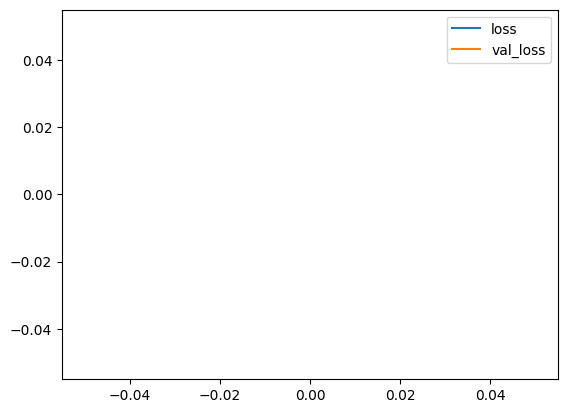

In [290]:
loss_df.plot()

In [291]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [292]:
prediction = model.predict(X_test)

203/203 [==============================] - 0s 1ms/step


In [293]:
prediction

array([[nan],
       [nan],
       [nan],
       ...,
       [nan],
       [nan],
       [nan]], dtype=float32)

In [ ]:
mean_squared_error(y_test,prediction)

In [ ]:
mean_absolute_error(y_test,prediction)

In [295]:
df['price'].describe()

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [296]:
from sklearn.metrics import explained_variance_score

In [ ]:
explained_variance_score(y_test,prediction)

In [ ]:
plt.figure(figsize=(12,8))
plt.scatterplot(y_test,prediction)
plt.plot(y_test,y_test,'r')

In [299]:
single_house = df.drop('price',axis=1).iloc[0]

In [300]:
single_house

bedrooms            3.0000
bathrooms           1.0000
sqft_living      1180.0000
sqft_lot         5650.0000
floors              1.0000
waterfront          0.0000
view                0.0000
condition           3.0000
grade               7.0000
sqft_above       1180.0000
sqft_basement       0.0000
yr_built         1955.0000
yr_renovated        0.0000
lat                47.5112
long             -122.2570
sqft_living15    1340.0000
sqft_lot15       5650.0000
year             2014.0000
month              10.0000
Name: 0, dtype: float64

In [303]:
single_house.values

array([ 3.00000e+00,  1.00000e+00,  1.18000e+03,  5.65000e+03,
        1.00000e+00,  0.00000e+00,  0.00000e+00,  3.00000e+00,
        7.00000e+00,  1.18000e+03,  0.00000e+00,  1.95500e+03,
        0.00000e+00,  4.75112e+01, -1.22257e+02,  1.34000e+03,
        5.65000e+03,  2.01400e+03,  1.00000e+01])

In [304]:
single_house.values.reshape(-1,19)

array([[ 3.00000e+00,  1.00000e+00,  1.18000e+03,  5.65000e+03,
         1.00000e+00,  0.00000e+00,  0.00000e+00,  3.00000e+00,
         7.00000e+00,  1.18000e+03,  0.00000e+00,  1.95500e+03,
         0.00000e+00,  4.75112e+01, -1.22257e+02,  1.34000e+03,
         5.65000e+03,  2.01400e+03,  1.00000e+01]])

In [305]:
single_house = scaler.transform(single_house.values.reshape(-1,19))

In [306]:
model.predict(single_house)

1/1 [==============================] - 0s 44ms/step


array([[nan]], dtype=float32)